Inputs Shape: (1540, 784)
Targets Shape: (1540, 154)
[0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.98823528 0.98823528
 0.98823528 0.98823528 0.98823528 0.99215685 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.999999

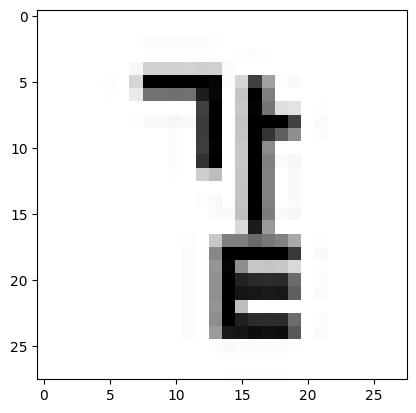

3


In [1]:
import os
import sys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 현재 작업 중인 Notebook의 경로 가져오기
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../utils")))

from data import preprocess_data

csv_path = "../Data/font_data.csv"
inputs, targets_one_hot, targets = preprocess_data(csv_path)
print(f"Inputs Shape: {inputs.shape}")
print(f"Targets Shape: {targets_one_hot.shape}")
print(inputs[3])

image_array = np.asfarray(inputs[3]).reshape((28, 28))
plt.imshow(image_array, cmap='gray', interpolation='None')
plt.show()

print(targets[3])

In [ ]:
import os
import sys 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 현재 작업 중인 Notebook의 경로 가져오기
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../utils")))
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "../class")))

from data import preprocess_data

from Train import Train

# 실험 설정
csv_path = "../Data/font_data.csv"

train_instance = Train(
    epoch=20,
    batch=10,
    activation="relu",
    output_activation="softmax",
    weight_init="He",
    optimizer="adam",
    dropout=0.5,
    learning_rate=0.01,
)

# 데이터 로드
inputs, targets_one_hot, targets = train_instance.load_data(csv_path)

# K-Fold Cross Validation 준비
folds = train_instance.k_fold_split(inputs, targets_one_hot)

# 학습 실행
for i, (X_train, y_train, X_val, y_val) in enumerate(folds):
    print(f"Fold {i + 1}/{len(folds)}")
    train_instance.train(X_train, y_train, X_val, y_val)

# 결과 저장 및 시각화
train_instance.save_results()
train_instance.plot_history()
